In [1]:
# for array operations
import numpy as np
# for visualizing data
import matplotlib.pyplot as plt
# for using dataframe
import pandas as pd
# for splitting the data into train and test sets
from sklearn.model_selection import train_test_split
# for applying feature scaling
from sklearn.preprocessing import StandardScaler
# For calculating metrics and visualizing prediction related metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.pipeline import make_pipeline
#importing SVM classifier
from sklearn.svm import SVC

In [2]:
#reading the data
dataset = pd.read_csv("heart.csv")

In [3]:
print(dataset.head())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


In [4]:
X = dataset.iloc[:,:11]

In [5]:
print(X.head())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  
0              N      0.0       Up  
1              N      1.0     Flat  
2              N      0.0       Up  
3              Y      1.5     Flat  
4              N      0.0       Up  


In [6]:
y = dataset.iloc[:,11]

In [7]:
print(y.head())

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64


In [8]:
#Creating a classifier from make_pipeline which applies scalling for each column for us. Using SVC classifier
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))

In [9]:
#Encoding strings to integers types based on unique values
sex_map = {'M':0, 'F':1}
X['Sex']= X['Sex'].map(sex_map)
print(X['Sex'].head())

0    0
1    1
2    0
3    1
4    0
Name: Sex, dtype: int64


In [10]:
#Finding length and pritning all unique values
print(len(pd.unique(X['ChestPainType'])))
print(pd.unique(X['ChestPainType']))

4
['ATA' 'NAP' 'ASY' 'TA']


In [11]:
#Encoding strings to integers types based on unique values
chestPainType_map = {'ATA':0, 'NAP':1, 'ASY':2, 'TA':3}
X['ChestPainType']= X['ChestPainType'].map(chestPainType_map)
print(X['ChestPainType'].head())

0    0
1    1
2    0
3    2
4    1
Name: ChestPainType, dtype: int64


In [12]:
#Encoding strings to integers types based on unique values
print(len(pd.unique(X['RestingECG'])))
print(pd.unique(X['RestingECG']))

3
['Normal' 'ST' 'LVH']


In [13]:
#Encoding strings to integers types based on unique values
restingECG_map = {'Normal':0, 'ST':1, 'LVH':2}
X['RestingECG']= X['RestingECG'].map(restingECG_map)
print(X['RestingECG'].head())

0    0
1    0
2    1
3    0
4    0
Name: RestingECG, dtype: int64


In [14]:
#Encoding strings to integers types based on unique values
print(len(pd.unique(X['ExerciseAngina'])))
print(pd.unique(X['ExerciseAngina']))

2
['N' 'Y']


In [15]:
#Encoding strings to integers types based on unique values
exerciseAngina_map = {'N':0, 'Y':1}
X['ExerciseAngina']= X['ExerciseAngina'].map(exerciseAngina_map)
print(X['ExerciseAngina'].head())

0    0
1    0
2    0
3    1
4    0
Name: ExerciseAngina, dtype: int64


In [16]:
#Encoding strings to integers types based on unique values
print(len(pd.unique(X['ST_Slope'])))
print(pd.unique(X['ST_Slope']))

3
['Up' 'Flat' 'Down']


In [17]:
#Encoding strings to integers types based on unique values
ST_Slope_map = {'Up':1, 'Flat':0, 'Down':-1}
X['ST_Slope']= X['ST_Slope'].map(ST_Slope_map)
print(X['ST_Slope'].head())

0    1
1    0
2    1
3    0
4    1
Name: ST_Slope, dtype: int64


In [18]:
print(X.head())

   Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    0              0        140          289          0           0   
1   49    1              1        160          180          0           0   
2   37    0              0        130          283          0           1   
3   48    1              2        138          214          0           0   
4   54    0              1        150          195          0           0   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  
0    172               0      0.0         1  
1    156               0      1.0         0  
2     98               0      0.0         1  
3    108               1      1.5         0  
4    122               0      0.0         1  


In [19]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25,random_state=0)

In [20]:
#Training the model based on training data set
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [21]:
#Testing the score of trained model based on test data set
clf.score(X_test, y_test)

0.8521739130434782

In [22]:
#storing the predicted values in a series
pred = clf.predict(X_test)

In [23]:
#Making a confusion matrix based on y_test(actual data) and pred(predicted data)
matrix = confusion_matrix(y_test,pred, labels=[1,0])

In [24]:
#Counting true positive, false negative, false positive, true negative
tp, fn, fp, tn = confusion_matrix(y_test,pred,labels=[1,0]).reshape(-1)

In [25]:
print('Outcome values : \n', tp, fn, fp, tn)

Outcome values : 
 126 12 22 70


In [26]:
#Calculating accuracy, precision, f1-score, recall
matrix = classification_report(y_test,pred,labels=[1,0])
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           1       0.85      0.91      0.88       138
           0       0.85      0.76      0.80        92

    accuracy                           0.85       230
   macro avg       0.85      0.84      0.84       230
weighted avg       0.85      0.85      0.85       230



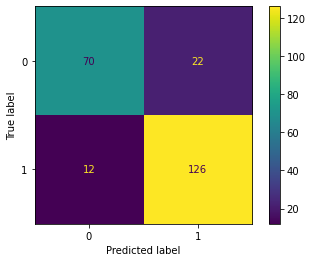

In [27]:
#Plotting a confusion matrix for better visualization
plot_confusion_matrix(clf, X_test, y_test)
plt.show()

In [28]:
# using MLP classfier to map input to an output
from sklearn.neural_network import MLPClassifier

In [29]:
# using scaler to feature scale, helps in faster cost reductions per iteration.
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [30]:
# creating a classifier object with certain parameters
# such as alpha, perceptron architecture, random state and max iterations
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(3,2),random_state=1,max_iter=1000)

In [31]:
# passing the data to the classfier for training
clf.fit(X_train,y_train)
#Testing the score of trained model based on test data set
clf.score(X_test, y_test)

0.8434782608695652

In [32]:
# After training, testing the newly learned model with new test set inputs storing them in pred
pred=clf.predict(X_test)

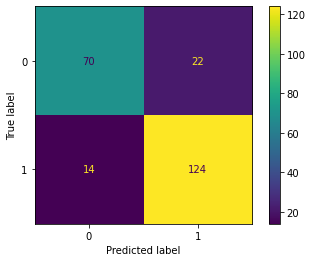

In [33]:
#Plotting a confusion matrix for better visualization
plot_confusion_matrix(clf, X_test, y_test)
plt.show()

In [34]:
#Making a confusion matrix based on y_test(actual data) and pred(predicted data)
matrix = confusion_matrix(y_test,pred, labels=[1,0])

In [35]:
#Counting true positive, false negative, false positive, true negative
tp, fn, fp, tn = confusion_matrix(y_test,pred,labels=[1,0]).reshape(-1)

In [36]:
print('Outcome values : \n', tp, fn, fp, tn)

Outcome values : 
 124 14 22 70


In [37]:
#Calculating accuracy, precision, f1-score, recall
matrix = classification_report(y_test,pred,labels=[1,0])
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           1       0.85      0.90      0.87       138
           0       0.83      0.76      0.80        92

    accuracy                           0.84       230
   macro avg       0.84      0.83      0.83       230
weighted avg       0.84      0.84      0.84       230

